In [98]:
import datetime as DT
import io
import numpy as np
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
players=pd.read_json('C:\\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\players.json')
players

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Ma\u00e2loul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Ma\u00e2loul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,C\u00e1ceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. C\u00e1ceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


In [5]:
#Dropping unnecessary columns
players_imp=players.drop(columns=['passportArea','weight','firstName','middleName','lastName','currentTeamId','height','role','birthArea','wyId','foot','currentNationalTeamId'])
players_imp
players_shortname=players_imp.drop(columns=['birthDate'])
players_shortname

,shortName
0,H. Tekin
1,M. Sarr
2,O. Mandanda
3,A. N'Diaye
4,I. Konat\u00e9
...,...
3598,A. Ma\u00e2loul
3599,C. C\u00e1ceda
3600,M. Araujo
3601,A. Tagnaouti


In [6]:
players_imp

,birthDate,shortName
0,1989-06-17,H. Tekin
1,1999-01-23,M. Sarr
2,1998-10-26,O. Mandanda
3,1990-03-06,A. N'Diaye
4,1999-05-25,I. Konat\u00e9
...,...,...
3598,1990-01-01,A. Ma\u00e2loul
3599,1991-09-27,C. C\u00e1ceda
3600,1994-10-24,M. Araujo
3601,1996-04-05,A. Tagnaouti


In [7]:
# calculating age of the players
import datetime as DT
players_imp['age']=pd.to_datetime(players_imp['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - players_imp['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,20
2,20
3,29
4,20
...,...
3598,29
3599,28
3600,24
3601,23


In [8]:
players_age=pd.concat([players_shortname,age],axis=1)
players_age

,shortName,age
0,H. Tekin,30
1,M. Sarr,20
2,O. Mandanda,20
3,A. N'Diaye,29
4,I. Konat\u00e9,20
...,...,...
3598,A. Ma\u00e2loul,29
3599,C. C\u00e1ceda,28
3600,M. Araujo,24
3601,A. Tagnaouti,23


#### Calculating the median age of the players

In [17]:
med_age=players_age.age.median()
med_age

27.0

#### Boxplot visualization

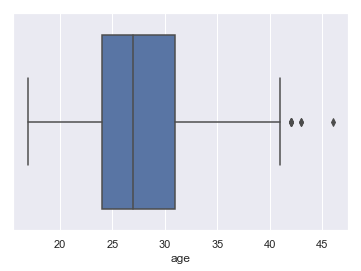

In [18]:
sns.set(style="darkgrid")
boxplot = sns.boxplot(x="age", data=players_age)
boxplot

#### Frequency of players with different ages

In [9]:
table_freq=players_age.groupby('age').size()
#table-freq=table_freq.reset_index(drop=True)
df= pd.DataFrame(table_freq)
serial_no=list(range(14))
df=df.reset_index()
df.columns=['age','frequency']
df

,age,frequency
0,17,3
1,18,19
2,19,66
3,20,153
4,21,185
5,22,215
6,23,234
7,24,230
8,25,229
9,26,244


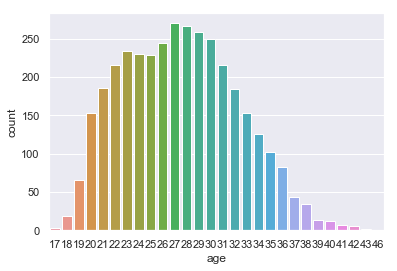

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=players_age)
ax

In [40]:
player_eff=pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\final_player_ratio.json')
player_eff


,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1987-04-24,48,J. Vertonghen,2119,0.894093,2370
1,1992-02-14,54,C. Eriksen,1821,0.829235,2196
2,1990-09-19,8945,K. Trippier,1069,0.815408,1311
3,1987-07-16,11152,M. Demb\u00e9l\u00e9,1278,0.936264,1365
4,1994-01-15,210044,E. Dier,1913,0.891011,2147
...,...,...,...,...,...,...
100,1991-04-19,9277,S. Cook,1007,0.811442,1241
101,1995-02-18,134102,N. Ak\u00e9,1341,0.871345,1539
102,1997-02-03,302518,L. Cook,991,0.836993,1184
103,1989-08-12,7929,T. Cleverley,933,0.863090,1081


In [59]:
player_ex_dob=player_eff.drop(columns=['birthDate'])
player_ex_dob

,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,48,J. Vertonghen,2119,0.894093,2370
1,54,C. Eriksen,1821,0.829235,2196
2,8945,K. Trippier,1069,0.815408,1311
3,11152,M. Demb\u00e9l\u00e9,1278,0.936264,1365
4,210044,E. Dier,1913,0.891011,2147
...,...,...,...,...,...
100,9277,S. Cook,1007,0.811442,1241
101,134102,N. Ak\u00e9,1341,0.871345,1539
102,302518,L. Cook,991,0.836993,1184
103,7929,T. Cleverley,933,0.863090,1081


In [60]:
player_eff['age'] = pd.to_datetime(player_eff['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - player_eff['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,32
1,27
2,29
3,32
4,25
...,...
100,28
101,24
102,22
103,30


In [62]:
players_age_eff=pd.concat([player_ex_dob,age],axis=1).drop(columns=['Efficiency'])
players_age_eff

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
0,48,J. Vertonghen,2119,2370,32
1,54,C. Eriksen,1821,2196,27
2,8945,K. Trippier,1069,1311,29
3,11152,M. Demb\u00e9l\u00e9,1278,1365,32
4,210044,E. Dier,1913,2147,25
...,...,...,...,...,...
100,9277,S. Cook,1007,1241,28
101,134102,N. Ak\u00e9,1341,1539,24
102,302518,L. Cook,991,1184,22
103,7929,T. Cleverley,933,1081,30


# Research Question: Does age group influence acuracy:

In [63]:
table1= players_age_eff.query('20.5<=age<=25.5')
table1

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
4,210044,E. Dier,1913,2147,25
5,13484,D. Alli,955,1184,23
7,257762,D. S\u00e1nchez,1644,1803,23
17,230020,A. Iwobi,1002,1140,23
25,167145,Beller\u00edn,1597,1877,24
27,135114,P. H\u00f8jbjerg,960,1064,24
28,268776,W. Hoedt,1047,1248,25
31,265366,W. Ndidi,1271,1562,22
34,135103,A. Christensen,1211,1288,23
50,9380,J. Stones,1177,1204,25


In [64]:
table2=players_age_eff.query('25.5<=age<=30.5')
table2

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
1,54,C. Eriksen,1821,2196,27
2,8945,K. Trippier,1069,1311,29
6,136441,B. Davies,1091,1349,26
8,8125,J. Cork,1304,1532,30
9,119951,Ahmed Hegazy,899,1128,28
...,...,...,...,...,...
94,9227,M. Ritchie,795,1057,30
96,252365,D. Yedlin,819,1055,26
100,9277,S. Cook,1007,1241,28
103,7929,T. Cleverley,933,1081,30


In [65]:
table3=players_age_eff.query('30.5<=age<=35.5')
table3

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
0,48,J. Vertonghen,2119,2370,32
3,11152,M. Demb\u00e9l\u00e9,1278,1365,32
18,3319,M. \u00d6zil,1578,1790,31
20,3560,Nacho Monreal,1536,1694,33
22,7855,L. Koscielny,1526,1667,34
35,7887,G. Cahill,1134,1252,33
41,3350,F\u00e0bregas,1731,2024,32
43,70086,N. Otamendi,2784,2964,31
45,105339,Fernandinho,2618,2842,34
47,8307,V. Kompany,1313,1391,33


In [92]:
s11=table1['AccuratePassesNumber'].sum()
s12=table1['TotalPassesNumber'].sum()
s13=s12-s11
L1=list([s11,s13])
L1

[21227, 3278]

In [93]:
s21=table2['AccuratePassesNumber'].sum()
s22=table2['TotalPassesNumber'].sum()
s23=s22-s21
L2=list([s21,s23])
L2

[79828, 14416]

In [94]:
s31=table3['AccuratePassesNumber'].sum()
s32=table3['TotalPassesNumber'].sum()
s33=s32-s31
L3=list([s31,s33])
L3

[34010, 4833]

In [95]:
table=[L1,L2,L3]
table

[[21227, 3278], [79828, 14416], [34010, 4833]]

In [96]:
data = [['20.5-25.5', s11,s12], ['25.5-30.5', s21,s22], ['30.5-35.5', s31,s32]] 
df_data = pd.DataFrame(data, columns = ['Age_group', 'Total_AccuratePassesNumber','Total_InaccuaratePassesNumber'])
df_data

,Age_group,Total_AccuratePassesNumber,Total_InaccuaratePassesNumber
0,20.5-25.5,21227,24505
1,25.5-30.5,79828,94244
2,30.5-35.5,34010,38843


### Chi-Squared Test 
A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the above contingency table.

H0 : The null Hypothesis is that there's no statistically significant relationship between age of the players and the efficiency of the players 

H1: The alternative hypotesis is that there's significant relationship between age of the players and the efficiency of the players.

In [97]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[21002.13097746  3502.86902254]
 [80772.28450683 13471.71549317]
 [33290.58451571  5552.41548429]]
probability=0.950, critical=5.991, stat=202.831
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


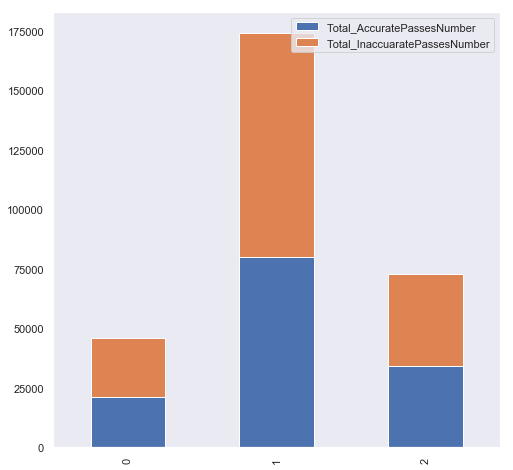

In [101]:
df_data.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

#### Consider the level of significance $\alpha$ be 0.05. From the chi square test, we observe that the p-value is 0.000. Which is indeed less than the level of significance $\alpha$. As, $p<\alpha$, we reject the null hypothesis and can claim that there is significant statistical relationship between the age of a player and his efficiency.